In [45]:
import os
from os import path
from wordcloud import WordCloud
from bs4 import BeautifulSoup
import requests
from newspaper import Article
import numpy as np
import matplotlib.pyplot as plt

We want to create a Word Cloud based on a number of articles to aggregate/summarize information and allow the user a quick picture into daily news without scrolling through dozens of articles.

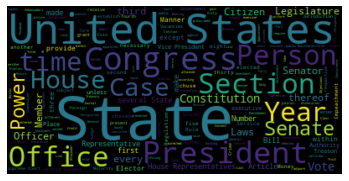

In [4]:
d = path.dirname(__file__) if "__file__" in locals() else os.getcwd()

text = open(path.join(d, 'constitution.txt')).read()

wordcloud = WordCloud(min_word_length=4).generate(text)

import matplotlib.pyplot as plt
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()


We have to first webscrape articles to do this.

In [11]:
articleReqested = requests.get("https://www.cnn.com/2021/03/27/politics/kamala-harris-vice-presidents-residence/index.html")
articleContent = articleReqested.content

In [12]:
articleSoup = BeautifulSoup(articleContent, 'html5lib')

In [21]:
coverpage_news = articleSoup.find_all('h1')
extracted_news = list()
for i in coverpage_news:
    extracted_news.append( i.get_text() )
print(extracted_news)

["After two months in office, Kamala Harris is still living out of suitcases -- and she's getting frustrated with it"]


In [84]:
articleReqested = Article("https://www.cnn.com/2021/03/27/politics/kamala-harris-vice-presidents-residence/index.html", language="en")
articleReqested.download()
articleReqested.parse()
print(articleReqested.title)
print(articleReqested.text)

After two months in office, Kamala Harris is still living out of suitcases -- and she's getting frustrated with it
(CNN) It has been more than two months since Kamala Harris was sworn in as vice president of the United States, a historic moment for the country , as Harris is the first woman and the first woman of color to hold the second highest office in the land. Yet, Harris -- along with her husband, Georgetown Law professor Douglas Emhoff -- is still, ostensibly, living out of suitcases, unable to move into the private residence reserved for the vice president because it's still undergoing renovations.

It's unclear why the renovations are taking so long, said one administration official, but it's a situation that has left Harris increasingly and understandably bothered, according to several people who spoke to CNN about her situation. "She is getting frustrated," said another administration official, noting with each passing day the desire to move in to her designated house -- a s

In [74]:
print(articleReqested.keywords)

[]


In [88]:
def convert(lst):
    wordList = lst.split()
    for i, j in enumerate( wordList ):
        wordList[i] = j.lower()
    return wordList

# def convert(lst):
#     wordList = lst.split()
#     for i, j in enumerate( wordList ):
#         wordList[i] = j.lower()
#     wordUnique = list( set(wordList) )
# #     print(wordUnique)
#     def countKey(x):
#         return wordList.count(x)
#     wordUnique.sort(reverse = True, key = countKey)
# #     print(wordUnique)
#     return wordList

In [89]:
articleWords = convert(articleReqested.text) 
print(articleWords)

['(cnn)', 'it', 'has', 'been', 'more', 'than', 'two', 'months', 'since', 'kamala', 'harris', 'was', 'sworn', 'in', 'as', 'vice', 'president', 'of', 'the', 'united', 'states,', 'a', 'historic', 'moment', 'for', 'the', 'country', ',', 'as', 'harris', 'is', 'the', 'first', 'woman', 'and', 'the', 'first', 'woman', 'of', 'color', 'to', 'hold', 'the', 'second', 'highest', 'office', 'in', 'the', 'land.', 'yet,', 'harris', '--', 'along', 'with', 'her', 'husband,', 'georgetown', 'law', 'professor', 'douglas', 'emhoff', '--', 'is', 'still,', 'ostensibly,', 'living', 'out', 'of', 'suitcases,', 'unable', 'to', 'move', 'into', 'the', 'private', 'residence', 'reserved', 'for', 'the', 'vice', 'president', 'because', "it's", 'still', 'undergoing', 'renovations.', "it's", 'unclear', 'why', 'the', 'renovations', 'are', 'taking', 'so', 'long,', 'said', 'one', 'administration', 'official,', 'but', "it's", 'a', 'situation', 'that', 'has', 'left', 'harris', 'increasingly', 'and', 'understandably', 'bothered

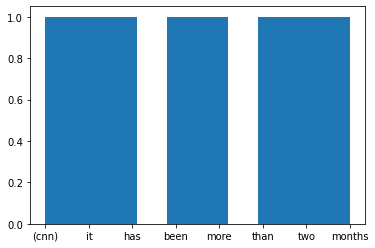

In [72]:
plt.hist(articleWords[:8]) 
plt.show()

<h1> Doing Multiple Links </h1>

In [92]:
links = ['https://www.cnn.com/2021/03/27/politics/kamala-harris-vice-presidents-residence/index.html', 
         'https://www.nytimes.com/2021/03/25/us/politics/biden-white-house-press-conference.html',
        'https://www.foxnews.com/politics/trump-dhs-officials-biden-purge-homeland-security-advisory-council']


In [93]:
def convert(lst):
    wordList = lst.split()
    for i, j in enumerate( wordList ):
        wordList[i] = j.lower()
    return wordList


In [94]:
articleWords = list() # aggregated words

for article in links:
    articleReqested = Article(article, language="en")
    articleReqested.download()
    articleReqested.parse()
    articleWords.append( convert(articleReqested.text) )

In [100]:
print(len(articleWords))

3


In [101]:
with open('politicsArticles.txt', 'w') as f:
    for article in articleWords:
        for word in article:
            f.write("%s\n" % word)

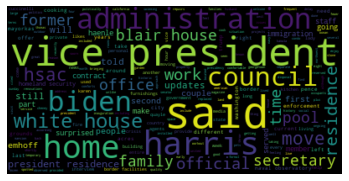

In [102]:
d = path.dirname(__file__) if "__file__" in locals() else os.getcwd()

text = open(path.join(d, 'politicsArticles.txt')).read()

wordcloud = WordCloud(min_word_length=4).generate(text)

import matplotlib.pyplot as plt
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()